In [19]:
import numpy as np
from scipy.stats import truncnorm, norm
import matplotlib.pyplot as plt


In [70]:
def get_trunc_gaussian_param(alpha, k):
    myclip_b = (k**0.5)*(1/alpha - 1/2)
    myclip_a = -myclip_b
    loc = 0
    scale = (2*k)**0.5/alpha
    a, b = (myclip_a - loc) / scale, (myclip_b - loc) / scale
    return a, b, loc, scale

def shrink_factor(alpha):
    rv = norm()
    c =  (2-alpha) /(2*(2**0.5) )
    factor = 2*c * rv.pdf( c) / ( rv.cdf(c) - rv.cdf(-c) )
    return (1 - factor)

In [79]:
shrink_factor(0.1)

0.1415665162740639

alpha=0.3
5.0986063818028615
5.098606381802871
177.77777777777777
34.86791575287594
0.1147186435905646
alpha=0.5
1.444516871363085
1.4445168713630867
64.0
44.305470755497566
0.09028230446019292
alpha=0.8
0.36607804331574223
0.36607804331574356
24.999999999999996
68.29144893138948
0.058572486930518974
alpha=1
0.1639055584566429
0.16390555845664379
16.0
97.61718974425385
0.040976389614160946
alpha=2
nan
nan
4.0
nan
nan


<ipython-input-70-a381e606e3c1>:12: RuntimeWarning: invalid value encountered in double_scalars
  factor = 2*c * rv.pdf( c) / ( rv.cdf(c) - rv.cdf(-c) )


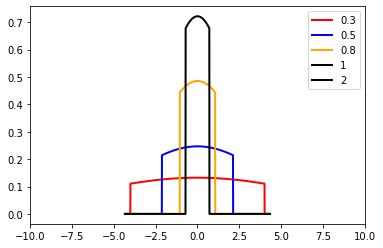

In [83]:
fig, ax = plt.subplots(1, 1)

alpha_list = [0.3, 0.5, 0.8, 1, 2]
x = np.linspace(-1/alpha_list[0]-1, 1/alpha_list[0]+1, 1000)

color_list = ["red", "blue", "orange", "black",  "black",  "black",  "black"]
k=2
for i, alpha in enumerate(alpha_list):
    a, b, loc, scale = get_trunc_gaussian_param(alpha, k)
    mean, var, skew, kurt = truncnorm.stats(a, b, loc=loc, scale = scale, moments='mvsk')
    print(f"alpha={alpha}")
    print(var)
    print( 2*k/(alpha**2) * shrink_factor(alpha))
    print(8*k/(alpha**2))
    print(8*k/(alpha**2)/var)
    print( shrink_factor(alpha))
    rv = truncnorm(a, b, loc=loc, scale = scale)
    ax.plot(x, rv.pdf(x), 'k-', lw=2, color= color_list[i], label = alpha)
ax.set_xlim([-10,10])
ax.legend()





In [37]:
import torch
from torch.nn import init

tensor(5.2431)
tensor(1.3991)
tensor(0.3620)
tensor(0.1590)
tensor(0.)


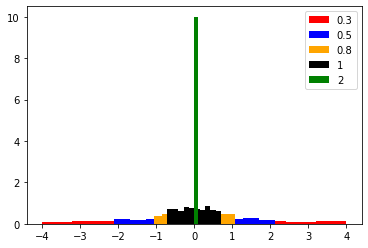

In [82]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(truncnorm.ppf(0.01, -1/0.1-1, 1/0.1+1),
                truncnorm.ppf(0.99, -1/0.1-1, 1/0.1+1), 100)

alpha_list = [0.3, 0.5, 0.8, 1, 2]
k=2
color_list = ["red", "blue", "orange", "black", "green"]
for i, alpha in enumerate(alpha_list):
    
    w = torch.empty(1, 1000)
    b = (k**0.5)*(1/alpha - 1/2)
    w = torch.nn.init.trunc_normal_(w,  mean=0.0, std=((2*k)**0.5)/alpha, a = -b, b=b)
    print(w.var())
    ax.hist(w, density = True, color= color_list[i], label = alpha)
ax.legend()


array(0.33311116)

In [81]:
torch.tensor(2).sqrt()

tensor(1.4142)